In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Ellipse, Rectangle


In [4]:
%matplotlib inline

In [5]:
img_file = "/mnt/Enterprise/safal/AI_assisted_microscopy_system/cysts_dataset_all/brightfield_reference/train/BR0003.jpg"


In [6]:
img = mpimg.imread(img_file)


In [11]:
def create_ellipse(x, y, w, h, angle):
    return Ellipse((x, y), w, h, angle=angle, fill=False, color="red")


def create_rectangle(x, y, w, h):
    return Rectangle((x, y), w, h, fill=False, color="blue")


import math


def parse_annotation(annotation):
    ellipses = []
    rectangles = []
    for ellipse_attribute in annotation["ellipses"]:
        x, y, w, h, angle = (
            ellipse_attribute["shape_attributes"]["cx"],
            ellipse_attribute["shape_attributes"]["cy"],
            2 * ellipse_attribute["shape_attributes"]["rx"],
            2 * ellipse_attribute["shape_attributes"]["ry"],
            math.degrees(ellipse_attribute["shape_attributes"]["theta"]),
        )
        ellipses.append(create_ellipse(x, y, w, h, angle))

    for rectangle_attribute in annotation["rectangles"]:
        x, y, w, h = (
            rectangle_attribute["bbox"][0],
            rectangle_attribute["bbox"][1],
            rectangle_attribute["bbox"][2],
            rectangle_attribute["bbox"][3],
        )
        rectangles.append(create_rectangle(x, y, w, h))

    return ellipses, rectangles


In [13]:
annotations = {
    "ellipses": [
        {
            "shape_attributes": {
                "name": "ellipse",
                "cx": 53,
                "cy": 258,
                "rx": 18,
                "ry": 12.257,
                "theta": 0.785,
            },
            "region_attributes": {"Cyst": "Giardia", "Confidence": "Sure"},
        },
        {
            "shape_attributes": {
                "name": "ellipse",
                "cx": 250,
                "cy": 92,
                "rx": 18.4,
                "ry": 12.146,
                "theta": -2.841,
            },
            "region_attributes": {"Cyst": "Giardia", "Confidence": "Sure"},
        },
        {
            "shape_attributes": {
                "name": "ellipse",
                "cx": 322,
                "cy": 107,
                "rx": 12.445,
                "ry": 20,
                "theta": -2.356,
            },
            "region_attributes": {"Cyst": "Giardia", "Confidence": "Sure"},
        },
        {
            "shape_attributes": {
                "name": "ellipse",
                "cx": 259,
                "cy": 223,
                "rx": 13.194,
                "ry": 18.8,
                "theta": 2.897,
            },
            "region_attributes": {"Cyst": "Giardia", "Confidence": "Sure"},
        },
        {
            "shape_attributes": {
                "name": "ellipse",
                "cx": 510,
                "cy": 26,
                "rx": 20,
                "ry": 8.246,
                "theta": 2.897,
            },
            "region_attributes": {"Cyst": "Giardia", "Confidence": "Sure"},
        },
        {
            "shape_attributes": {
                "name": "ellipse",
                "cx": 549,
                "cy": 240,
                "rx": 12,
                "ry": 18.409,
                "theta": -2.407,
            },
            "region_attributes": {"Cyst": "Giardia", "Confidence": "Sure"},
        },
        {
            "shape_attributes": {
                "name": "ellipse",
                "cx": 516,
                "cy": 321,
                "rx": 18.236,
                "ry": 12,
                "theta": -2.826,
            },
            "region_attributes": {"Cyst": "Giardia", "Confidence": "Sure"},
        },
    ],
    "rectangles": [
        {
            "image_id": 3,
            "id": 17,
            "category_id": 1,
            "bbox": [
                44.08480763283977,
                251.7487715362076,
                17.83038473432046,
                12.502456927584745
            ],
            "segmentation": [],
            "iscrowd": 0,
            "area": 222.92361714310613
        },
        {
            "image_id": 3,
            "id": 18,
            "category_id": 1,
            "bbox": [
                240.51030235071445,
                86.39045745847812,
                18.97939529857112,
                11.219085083043751
            ],
            "segmentation": [],
            "iscrowd": 0,
            "area": 212.93145067938997
        },
        {
            "image_id": 3,
            "id": 19,
            "category_id": 1,
            "bbox": [
                315.3716762165473,
                97.26424989681246,
                13.256647566905372,
                19.471500206375083
            ],
            "segmentation": [],
            "iscrowd": 0,
            "area": 258.1268158348397
        },
        {
            "image_id": 3,
            "id": 20,
            "category_id": 1,
            "bbox": [
                252.8865130175003,
                213.2785965048864,
                12.226973964999388,
                19.44280699022721
            ],
            "segmentation": [],
            "iscrowd": 0,
            "area": 237.7266948760162
        },
        {
            "image_id": 3,
            "id": 21,
            "category_id": 1,
            "bbox": [
                500.22115903978704,
                21.37686270214029,
                19.55768192042592,
                9.24627459571942
            ],
            "segmentation": [],
            "iscrowd": 0,
            "area": 180.8356974919952
        },
        {
            "image_id": 3,
            "id": 22,
            "category_id": 1,
            "bbox": [
                542.6187257533298,
                231.05560738569773,
                12.762548493340319,
                17.888785228604547
            ],
            "segmentation": [],
            "iscrowd": 0,
            "area": 228.3064889670155
        },
        {
            "image_id": 3,
            "id": 23,
            "category_id": 1,
            "bbox": [
                506.5972706474443,
                315.4568416293067,
                18.805458705111448,
                11.086316741386554
            ],
            "segmentation": [],
            "iscrowd": 0,
            "area": 208.48327167193057
        },
    ],
}


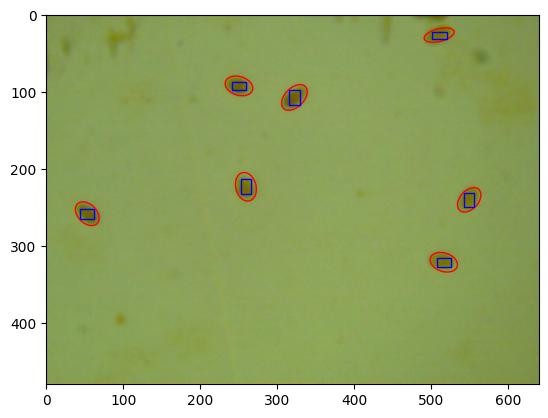

In [14]:
fig, ax = plt.subplots()
ellipses, rectangles = parse_annotation(annotations)
for ellipse in ellipses:
    ax.add_patch(ellipse)

for rectangle in rectangles:
    ax.add_patch(rectangle)

ax.imshow(img)
